# Topic Classification

Sophia Skowronski | Fall 2020

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
    
# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
    ### STUDENT START ###
    for i in range(num_examples):
        print('='*75)
        print('{}) LABEL: {}'.format(i+1, newsgroups_train.target_names[train_labels[i]]))
        print('-'*75)
        print('\n',train_data[i],'\n')
    ### STUDENT END ###
P1(5)

1) LABEL: comp.graphics
---------------------------------------------------------------------------

 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 

2) LABEL: talk.religion.misc
---------------------------------------------------------------------------

 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html'>CountVectorizer</a>


In [4]:
def P2():
    
    ### STUDENT START ###
    
    #####
    # 1 #
    #####
    
    print('{:^100}\n'.format('Using word unigram feature vectors'.upper()))
    
    # Transform the training data into a matrix of word unigram feature vectors
    vectorizer = CountVectorizer()
    
    # Learn the vocabulary dictionary and return document-term matrix.
    X = vectorizer.fit_transform(train_data.copy())
    print('Size of vocabulary: {:,}\n'.format(X.shape[1]))
    
    # Counts the number of non-zero values per example and takes mean
    print('Average number of non-zero features per example: {:.2f}\n'.format(X.getnnz(axis=1).mean()))
    
    # Get the count of explicitly-stored values (nonzeros), divide by total number of elements in array
    print('Fraction of non-zero entries in the matrix: {:.6f}\n'.format(X.nnz/(X.shape[0]*X.shape[1])))
    
    # Array mapping from feature integer indices to feature name.
    X_vocab = vectorizer.get_feature_names()
    print('0th and last feature strings: {}\n'.format([X_vocab[0], X_vocab[-1]]))
    
    #####
    # 2 #
    #####
    
    print('{:^100}\n'.format('Using word unigram feature vectors w/ 4-word vocabulary'.upper()))
    
    # Transform the training data into a matrix of word unigram feature vectors using new, 4-word vocabulary 
    vectorizer = CountVectorizer(vocabulary=['atheism', 'graphics', 'space', 'religion'])
    
    # Learn the vocabulary dictionary and return document-term matrix.
    X = vectorizer.fit_transform(train_data.copy())
    print('Size of vocabulary: {:,}\n'.format(X.shape[1]))
    
    # Counts the number of non-zero values in the array
    print('Average number of non-zero features per example: {:.4f}\n'.format(X.getnnz(axis=1).mean()))
    
    # Get the count of explicitly-stored values (nonzeros), divide by total number of elements in array
    #print('Fraction of non-zero entries in the matrix: {:.6f}\n'.format(X.nnz/(X.shape[0]*X.shape[1])))
    
    # Array mapping from feature integer indices to feature name.
    #X_vocab = vectorizer.get_feature_names()
    #print('0th and last feature strings: {}\n'.format([X_vocab[0], X_vocab[-1]]))
    
    #####
    # 3 #
    #####
    
    print('{:^100}\n'.format('Using character bigram and trigram feature vectors'.upper()))
    
    # Transform the training data into a matrix of character bigram and trigram feature vectors
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,3))

    # Learn the vocabulary dictionary and return document-term matrix.
    X = vectorizer.fit_transform(train_data.copy())
    print('Size of vocabulary: {:,}\n'.format(X.shape[1]))
    
    # Counts the number of non-zero values in the array
    #print('Average number of non-zero features per example: {:.2f}\n'.format(X.getnnz(axis=1).mean()))
    
    # Get the count of explicitly-stored values (nonzeros), divide by total number of elements in array
    #print('Fraction of non-zero entries in the matrix: {:.6f}\n'.format(X.nnz/(X.shape[0]*X.shape[1])))
    
    # Array mapping from feature integer indices to feature name.
    #X_vocab = vectorizer.get_feature_names()
    #print('0th and last feature strings: {}\n'.format([X_vocab[0], X_vocab[-1]]))
    
    #####
    # 4 #
    #####
    
    print('{:^100}\n'.format('Using word unigram feature vectors and pruning words that appear in fewer than 10 documents.'.upper()))
    
    # Transform the training data into a matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents.
    vectorizer = CountVectorizer(min_df=10)
    
    # Learn the vocabulary dictionary and return document-term matrix.
    X = vectorizer.fit_transform(train_data.copy())
    print('Size of vocabulary: {:,}\n'.format(X.shape[1]))
    
    # Counts the number of non-zero values in the array
    #print('Average number of non-zero features per example: {:.2f}\n'.format(X.getnnz(axis=1).mean()))
    
    # Get the count of explicitly-stored values (nonzeros), divide by total number of elements in array
    #print('Fraction of non-zero entries in the matrix: {:.6f}\n'.format(X.nnz/(X.shape[0]*X.shape[1])))
    
    # Array mapping from feature integer indices to feature name.
    #X_vocab = vectorizer.get_feature_names()
    #print('0th and last feature strings: {}\n'.format([X_vocab[0], X_vocab[-1]]))
    
    #####
    # 5 #
    #####

    print('{:^100}\n'.format('Using word unigram feature vectors, compare train and dev vocabularies'.upper()))

    # Transform the training data into a matrix of word unigram feature vectors.
    vectorizer = CountVectorizer() 
    
    # Build vocabularies for both training and development data and look at the size of the difference.
    
    # For training data, learn the vocabulary dictionary and return document-term matrix.
    X = vectorizer.fit_transform(train_data)
    X_vocab = vectorizer.get_feature_names()
    #print('For training data, there are {:,} messages, with a vocabulary of size {:,}\n'.format(X.shape[0],X.shape[1]))
    
    # For development data, learn the vocabulary dictionary and return document-term matrix.
    X_dev = vectorizer.fit_transform(dev_data)
    X_dev_vocab = vectorizer.get_feature_names()
    #print('For development data, there are {:,} messages, with a vocabulary of size {:,}\n'.format(X_dev.shape[0],X_dev.shape[1]))
    
    # Grab overlapping elements using helper function `common_elements`
    overlap = common_elements(X_dev_vocab, X_vocab)
    num_not_overlap = len(X_dev_vocab) - len(overlap)
    print('Fraction of words in the dev vocab missing from the train vocab: {:.4f}'.format(num_not_overlap/len(X_dev_vocab)))

def common_elements(a, b):
    i, j = 0, 0
    common = []
    while i < len(a) and j < len(b):
        if a[i] == b[j]:
            common.append(a[i])
            i += 1
            j += 1
        elif a[i] < b[j]:
            i += 1
        else:
            j += 1
    
    return common

    ### STUDENT END ###

P2()

                                 USING WORD UNIGRAM FEATURE VECTORS                                 

Size of vocabulary: 26,879

Average number of non-zero features per example: 96.71

Fraction of non-zero entries in the matrix: 0.003598

0th and last feature strings: ['00', 'zyxel']

                      USING WORD UNIGRAM FEATURE VECTORS W/ 4-WORD VOCABULARY                       

Size of vocabulary: 4

Average number of non-zero features per example: 0.2684

                         USING CHARACTER BIGRAM AND TRIGRAM FEATURE VECTORS                         

Size of vocabulary: 35,478

    USING WORD UNIGRAM FEATURE VECTORS AND PRUNING WORDS THAT APPEAR IN FEWER THAN 10 DOCUMENTS.    

Size of vocabulary: 3,064

               USING WORD UNIGRAM FEATURE VECTORS, COMPARE TRAIN AND DEV VOCABULARIES               

Fraction of words in the dev vocab missing from the train vocab: 0.2479


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html'>CountVectorizer</a> | <a href='https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>KNeighborsClassifier</a> | <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> | <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>LogisticRegression</a> | <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html'>metrics.f1_score</a>

1. K NEAREST NEIGBORS. The optimal f1 score is at k=7

k 	f1    
1 	0.3805
2 	0.3805
3 	0.4084
4 	0.4031
5 	0.4288
6 	0.4467
7 	0.4505
8 	0.447 
9 	0.4366
10	0.4279

2. NAIVE BAYES. The optimal f1 score is at alpha=0.1

alpha 	f1    
1e-10 	0.7472
0.0001	0.7628
0.001 	0.7703
0.01  	0.7752
0.1   	0.7903
0.5   	0.7863
1.0   	0.7777
2.0   	0.769 
10.0  	0.6675

3. LOGISTIC REGRESSION. The optimal f1 score is at C=0.3

C     	f1    	weight_0	weight_1	weight_2	weight_3
0.0001	0.5416	0.01    	0.01    	0.01    	0.01    
0.001 	0.6193	0.17    	0.2     	0.18    	0.19    
0.01  	0.6647	2.54    	2.94    	2.86    	2.25    
0.1   	0.6966	27.13   	24.66   	27.46   	23.02   
0.2   	0.7059	49.75   	42.74   	49.33   	42.67   
0.3   	0.7101	69.3    	57.87   	67.9    	59.76   
0.4   	0.7083	86.74   	71.15   	84.25   	75.06   
0.5   	0.7085	102.6   	83.12   	99.01   	88.98   
0.6   	0.7092	117.26  	94.07   	112.53  	101.85  
0.7   	0.6939	130.81  	104.17  	124.94  	113.84  
0.8   	0.6925	143.58  	113.59  

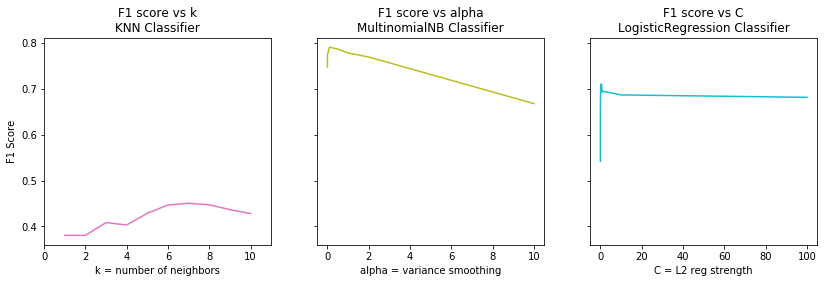

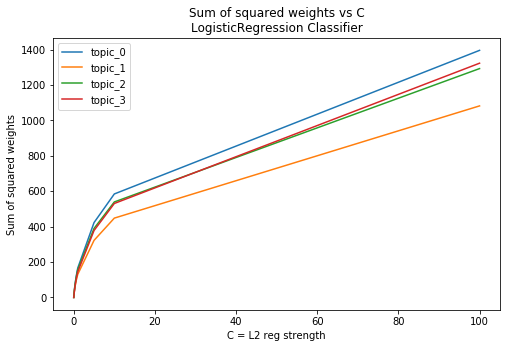

In [5]:
def P3():
    
    ### STUDENT START ###
    
    # Transform the training and development data into a matrix of word unigram feature vectors.
    vectorizer = CountVectorizer()
    
    # Learn the vocabulary dictionary and return document-term matrix.
    train_vector = vectorizer.fit_transform(train_data)
    train_vocab = np.array(vectorizer.get_feature_names())
    
    # Learn the training data vocabulary and return document-term matrix.
    dev_vector = vectorizer.transform(dev_data)
    
    #####
    # 1 #
    #####
    
    # Produce several k-Nearest Neigbors models by varying k, 
    # including one with k set to optimize f1 score. 
    # For each model, show the k value and f1 score.
    
    k_values = {'n_neighbors': np.arange(1,11)}
    f1_list = []
    matrix = [['k','f1']]
    max_f1 = 0
    max_val = 0
    
    for k in k_values['n_neighbors']:
        # Produce a k-nearest neighbor model.
        KNN = KNeighborsClassifier(n_neighbors=k)
        
        # Train on the transformed train data.
        KNN.fit(train_vector, train_labels)
        
        # Calculate f1 score.
        f1 = metrics.f1_score(dev_labels, KNN.predict(dev_vector), average='weighted')
        f1_list.append(f1)
        matrix.append([k,round(f1,4)])
        
        # Use max f1 score to determine optimal k
        if f1 > max_f1:
            max_f1 = f1
            max_val = k
    
    # Print
    print('{:}. The optimal f1 score is at k={:d}\n'.format('1. K Nearest Neigbors'.upper(),max_val))
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    print()

    # 1 x 3 subplots
    _, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
    
    # Lineplot
    plt.tight_layout(pad=3.0)
    ax[0].plot(k_values['n_neighbors'],f1_list, c='tab:pink')
    
    # Labels
    ax[0].set_xlim(0,11)
    ax[0].set_title('F1 score vs k\nKNN Classifier')
    ax[0].set_xlabel('k = number of neighbors')
    ax[0].set_ylabel('F1 Score')
    
    #####
    # 2 #
    #####
    
    # Produce several Naive Bayes models by varying smoothing (alpha), 
    # including one with alpha set approximately to optimize f1 score. 
    # For each model, show the alpha value and f1 score.
    
    alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    f1_list = []
    matrix = [['alpha','f1']]
    max_f1 = 0
    max_val = 0
    
    for alpha in alphas['alpha']:
        
        # Produce a Naive Bayes model.
        NB = MultinomialNB(alpha=alpha)
    
        # Train on the transformed train data.
        NB.fit(train_vector, train_labels)
        
        # Calculate f1 score.
        f1 = metrics.f1_score(dev_labels, NB.predict(dev_vector), average='weighted')
        f1_list.append(f1)
        matrix.append([alpha,round(f1,4)])
        
        # Use max f1 score to determine optimal k
        if f1 > max_f1:
            max_f1 = f1
            max_val = alpha
    
    # Print
    print('{}. The optimal f1 score is at alpha={}\n'.format('2. Naive Bayes'.upper(), max_val))
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    print()

    # Lineplot
    ax[1].plot(alphas['alpha'],f1_list, c='tab:olive')
    
    # Labels
    ax[1].set_title('F1 score vs alpha\nMultinomialNB Classifier')
    ax[1].set_xlabel('alpha = variance smoothing')
    
    #####
    # 3 #
    #####
    
    # Produce several Logistic Regression models by varying L2 
    # regularization strength (C), including one with C set 
    # approximately to optimize f1 score. For each model, show the 
    # C value, f1 score, and sum of squared weights for each topic.
    
    Cs = {'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0, 100.0]}
    f1_list = []
    matrix = [['C', 'f1', 'weight_0', 'weight_1', 'weight_2', 'weight_3']]
    sum_matrix = []
    max_f1 = 0
    max_val = 0
    
    for C in Cs['C']:
        
        # Produce a Logistic Regression model.
        LR = LogisticRegression(C=C, solver='liblinear')
    
        # Train on the transformed train data.
        LR.fit(train_vector, train_labels)
        
        # Calculate  f1 score.
        f1 = metrics.f1_score(dev_labels, LR.predict(dev_vector), average='weighted')
        f1_list.append(f1)
        
        # Use max f1 score to determine optimal k
        if f1 > max_f1:
            max_f1 = f1
            max_val = C
            
        # Caculate the sum of squared weights for each topic.
        sum_squared = np.sum(LR.coef_**2, axis=1)
        sum_matrix.append(sum_squared)
        matrix.append([C,round(f1,4),round(sum_squared[0],2),round(sum_squared[1],2),round(sum_squared[2],2),round(sum_squared[3],2)])

    # Print
    print('{}. The optimal f1 score is at C={}\n'.format('3. Logistic Regression'.upper(),max_val))
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    print()
    
    # Lineplot
    ax[2].plot(Cs['C'],f1_list, c='tab:cyan')
    
    # Labels
    ax[2].set_title('F1 score vs C\nLogisticRegression Classifier')
    ax[2].set_xlabel('C = L2 reg strength')
    
    # Plotting sum of squared weights by C
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    
    # Lineplots
    ax.plot(Cs['C'],[row[0] for row in sum_matrix], label='topic_0')
    ax.plot(Cs['C'],[row[1] for row in sum_matrix], label='topic_1')
    ax.plot(Cs['C'],[row[2] for row in sum_matrix], label='topic_2')
    ax.plot(Cs['C'],[row[3] for row in sum_matrix], label='topic_3')
    
    # Labels
    ax.set_title('Sum of squared weights vs C\nLogisticRegression Classifier')
    ax.set_xlabel('C = L2 reg strength')
    ax.set_ylabel('Sum of squared weights')
    ax.legend()
    
    plt.show()
    
    ### STUDENT END ###

a = P3()

**ANSWER**:

**4. Why doesn't k-Nearest Neighbors work well for this problem?**

KNN does not work well with this problem due to the curse of dimensionality and how the classifier calculates distance. The feature vectors for each example has 26,879 dimensions. Every time a new dimension is added to a dataset, it is harder for two separate points to be close together in Euclidean space. If there was more data, this would help this issue, as long as the new data adds to the overall density of data points in the higher dimensional space. So its hard to generalize for this  high dimensional feature set.

**5. Why doesn't Logistic Regression work as well as Naive Bayes does?**

Naive Bayes performs better here because there is a small amount of data, and under the current conditions (a training size of only 2,034 examples but feature vector size of 26,879 dimensions), generative models typically perform better than discriminative models. Additionally, Naive Bayes has the leverage of the changing probabilities which can happen prior and post a certain event, and Logistic Regression makes a prediction mades on a functional form, which will require more data for accuracy.

**6. What is the relationship between logistic regression's sum of squared weights vs. C value?**

Hyper parameter $C$ is the inverse of regularization strength $\lambda$ ($C=\frac{1}{\lambda}$). When increasing C, it becomes more likely that the parameters will increase to adjust for small perturbations in the data. You can see that in the plot the sum of squared coefficients increase with increasing C. Smaller values of C will make the sum of squared weights shrink to 0, which may lead to underfitting of the data.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

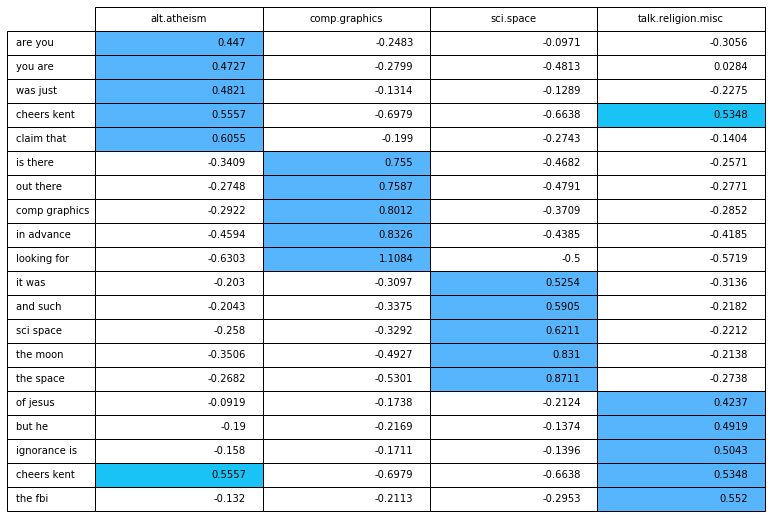

In [6]:
def P4():
    
    ### STUDENT START ###
    
    # Transform the training data into a matrix of word bigram feature vectors.
    vectorizer = CountVectorizer(ngram_range=(2,2))
    
    # Learn the vocabulary dictionary and return document-term matrix.
    train_vector = vectorizer.fit_transform(train_data)
    train_vocab = np.array(vectorizer.get_feature_names())
    
    # Produce a Logistic Regression model.
    LR = LogisticRegression(C=0.5, solver='liblinear')
    
    # Train on the transformed train data.
    LR.fit(train_vector, train_labels)
    
    # Find the 5 features with the largest weights 
    top_features = np.argsort(LR.coef_, axis=1)[:,-5:].flatten() # This picks the 5 rightmost values.

    # Produce 4 x 20 weight matrix
    wmatrix = np.round(LR.coef_[:,top_features],4)

    # Rotate 90 degrees clockwise
    wmatrix = np.rot90(wmatrix, axes=(1,0))
    
    # Flip order in left-right direction to correspond to increasing topic number [0, 1, 2, 3]
    wmatrix = np.fliplr(wmatrix) 
    
    # Create color matrix for table highlights!
    colormatrix = np.full((20,4), 'w', dtype=object)
    colormatrix[0:5,0]='#56b5fd'
    colormatrix[18,0]='#1ac3f5'
    colormatrix[5:10,1]='#56b5fd'
    colormatrix[10:15,2]='#56b5fd'
    colormatrix[15:20,3]='#56b5fd'
    colormatrix[3,3]='#1ac3f5'
    
    # Show a 20 row (features) x 4 column (topics) table of the weights.
    fig = plt.figure(figsize=(6,6))
    table = plt.table(cellText=wmatrix, 
                      colLabels=[newsgroups_train.target_names[0], 
                                 newsgroups_train.target_names[1],
                                 newsgroups_train.target_names[2],
                                 newsgroups_train.target_names[3]], 
                      cellColours=colormatrix,
                      rowLabels=np.take(train_vocab,top_features),
                      loc='center')
    table.scale(2,2)
    plt.axis('off')
    plt.show()

    ### STUDENT END ###

P4()

**ANSWER**:

2-3 of the top bigram feature vectors for each topic (weights highlighted in dark blue) contain filler phrases. More surprisingly, there is a higher weight attributed to the bigram "cheers kent" (weights in light blue) for both the atheism and religion-labeled text. Another curious thing to note is that "the FBI" is given the highest weight for relevance for religion-labeled text, and "looking for" is the highest weight for computer graphics. It would not surprise me if "looking for" is due to a percentage of the documents containing Stack Overflow-type text.

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

In [7]:
def better_preprocessor(s):
    
    ### STUDENT START ###
    
    # Update all letter characters to lowercase
    s = s.lower() 
    
    # Update characters with regular expressions
    s = re.sub('\d{4,}', ' ', s) # Replace sequences of numbers with space
    s = re.sub('\W+', ' ', s) # Replace special characters wth space
    s = re.sub('_', ' ', s) # Replace underscore character wth space
    
    # Remove list of curated stop words
    for word in ['has', 'it', 'one', 'if']:
        s = re.sub(word, '', s)
    
    # Lemmatize strings
    lemmatizer = nltk.stem.WordNetLemmatizer() 
    words=re.split('\s+',s) # Find words in string
    lemmed_words=[lemmatizer.lemmatize(word) for word in words] # Lemmatize each word
    s = ' '.join(lemmed_words) # Combine into one string

    return s
    
    ### STUDENT END ###

def P5():
    
    ### STUDENT START ###
    
    # Transform the training and development data into a matrix of word unigram feature vectors.
    vectorizer = CountVectorizer()
    
    # Learn the vocabulary dictionary and return document-term matrix.
    train_vector = vectorizer.fit_transform(train_data)
    train_vocab = np.array(vectorizer.get_feature_names())
    
    # Produce a Logistic Regression model
    LR = LogisticRegression(C=0.5, solver='liblinear', multi_class='auto')

    # Train on the transformed training data.
    LR.fit(train_vector, train_labels)
        
    # Learn the training data vocabulary and return document-term matrix.
    dev_vector = vectorizer.transform(dev_data)
    
    # Calculate f1 score.
    f1_before = metrics.f1_score(dev_labels, LR.predict(dev_vector), average='weighted')
    
    # Print
    print('Baseline Logistic Regression model:\n'.upper())
    matrix = [['vocab_size', 'f1'],['{:,}'.format(len(train_vocab)), '{:.4f}'.format(f1_before)]]
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    
    # Transform the training and development data into a matrix of word unigram feature vectors.
    # Preprocess strings with custom-defined function.
    vectorizer_better = CountVectorizer(preprocessor=better_preprocessor)
    
    # Learn the vocabulary dictionary and return document-term matrix.
    train_vector = vectorizer_better.fit_transform(train_data)
    train_vocab = np.array(vectorizer_better.get_feature_names())
    
    # Produce a Logistic Regression model
    LR = LogisticRegression(C=0.5, solver='liblinear', multi_class='auto')

    # Train on the transformed training data.
    LR.fit(train_vector, train_labels)
        
    # Learn the training data vocabulary and return document-term matrix.
    dev_vector = vectorizer_better.transform(dev_data)
    
    # Calculate f1 score.
    f1_after = metrics.f1_score(dev_labels, LR.predict(dev_vector), average='weighted')

    # Print
    print('\nImproved Logistic Regression model:'.upper())
    print(' + Replace w/ space: number sequences, special characters, underscores')
    print(' + Remove: {}'.format(['has', 'it', 'one', 'if']))
    print(' + Lemmatize words with WordNetLemmatizer\n')
    
    matrix = [['vocab_size', 'f1'],['{:,}'.format(len(train_vocab)), '{:.4f}'.format(f1_after)]]
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    
    print('\nIncrease in f1 score: {:.4f}'.format(f1_after-f1_before))

    ### STUDENT END ###

P5()

BASELINE LOGISTIC REGRESSION MODEL:

vocab_size	f1    
26,879    	0.7085

IMPROVED LOGISTIC REGRESSION MODEL:
 + Replace w/ space: number sequences, special characters, underscores
 + Remove: ['has', 'it', 'one', 'if']
 + Lemmatize words with WordNetLemmatizer

vocab_size	f1    
22,866    	0.7306

Increase in f1 score: 0.0221


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

C:\Users\sski\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LOGISTIC REGRESSION. The optimal f1 score is at C=1000.0

C       	f1                 	vocab_size
0.001   	0.33442786629546206	3         
0.01    	0.4651046135246244 	17        
0.1     	0.7069748233403524 	213       
0.15    	0.6958254446745351 	303       
0.2     	0.6920726509812909 	372       
0.3     	0.6719554925555481 	524       
0.4     	0.6781444498976172 	652       
0.5     	0.6734035446774553 	788       
0.6     	0.6822410766249637 	844       
0.7     	0.6770487856124607 	957       
0.8     	0.6784033925773374 	1133      
0.9     	0.6867903614441475 	1080      
1.0     	0.6887977489736785 	1129      
10.0    	0.7048426127974444 	3504      
100.0   	0.7074617859122574 	7800      
1000.0  	0.7084739776490449 	25416     
10000.0 	0.7084739776490449 	26849     
100000.0	0.7084739776490449 	26876     


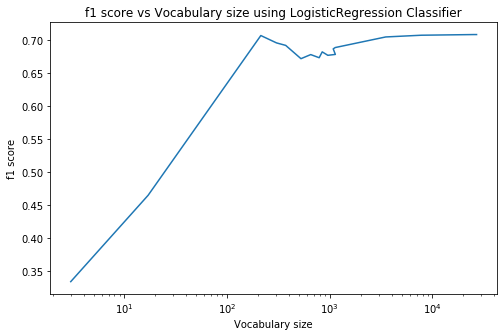

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    ### STUDENT START ###
    
    # Produce several Logistic Regression models by varying C
    Cs = {'C': [0.001, 0.01, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]}
    matrix = [['C', 'f1', 'vocab_size']]
    max_f1 = 0
    max_val = 0
    
    for C in Cs['C']:
        
        # Transform the training and development data into a matrix of word unigram feature vectors.
        vectorizer = CountVectorizer()
    
        # Learn the vocabulary dictionary and return document-term matrix.
        train_vector = vectorizer.fit_transform(train_data)
        train_vocab = np.array(vectorizer.get_feature_names())
        
        # Learn the training data vocabulary and return document-term matrix.
        dev_vector = vectorizer.transform(dev_data)
        
        # Produce a Logistic Regression model.
        LR1 = LogisticRegression(C=C, solver='liblinear', multi_class='auto', penalty='l1', tol=0.015)
    
        # Train on the transformed train data.
        LR1.fit(train_vector, train_labels)
        
        #  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.
        nonzero_features = np.unique(np.nonzero(LR1.coef_)[1])
        train_vocab_reduce = train_vocab[nonzero_features]
        vectorizer_reduce = CountVectorizer(vocabulary=train_vocab_reduce)
        
        # Update vocabulary
        train_vector_reduce = vectorizer_reduce.fit_transform(train_data)
        dev_vector_reduce = vectorizer_reduce.transform(dev_data)
        
        # Produce a Logistic Regression model.
        LR2 = LogisticRegression(C=0.5, solver='liblinear', multi_class='auto', penalty='l2')
    
        # Train on the transformed train data.
        LR2.fit(train_vector_reduce, train_labels)
        
        # Calculate  f1 score.
        f1 = metrics.f1_score(dev_labels, LR2.predict(dev_vector_reduce), average='weighted')
        
        # Use max f1 score to determine optimal k
        if f1 > max_f1:
            max_f1 = f1
            max_val = C
            
        # Caculate the sum of squared weights for each topic.
        matrix.append([C, f1, len(train_vocab_reduce)])
        
    # Print
    print('{}. The optimal f1 score is at C={}\n'.format('Logistic Regression'.upper(),max_val))
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    
    # Plotting sum of squared weights by C
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    
    # Lineplots
    matrix = np.array(matrix)[1:,:].astype('float64')
    ax.plot(matrix[:,2], matrix[:,1])
    
    # Labels
    ax.set_xscale('log')
    ax.set_title('f1 score vs Vocabulary size using LogisticRegression Classifier')
    ax.set_xlabel('Vocabulary size')
    ax.set_ylabel('f1 score')
    
    plt.show()
    
    ### STUDENT END ###

P6()

**ANSWER**:

The f1 score increases until C=0.1 and then flattens to a similar value . Larger vocabularies result in higher f1 scores, but the peak at C=0.1 (vocab_size=1129) is  close.

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.


In [9]:
def P7():
    
    ### STUDENT START ###
    
    # Transform the training and development data into a matrix of word unigram feature vectors.
    # Tfidf = term-frequency times inverse document-frequency.
    tv = TfidfVectorizer()
    
    # Learn the vocabulary dictionary and return document-term matrix.
    train_vector = tv.fit_transform(train_data)
    train_vocab = np.array(tv.get_feature_names())
    
    # Produce a Logistic Regression model
    LR = LogisticRegression(C=100, solver='liblinear')

    # Train on the transformed training data.
    LR.fit(train_vector, train_labels)
        
    # Learn the training data vocabulary and return document-term matrix.
    dev_vector = tv.transform(dev_data)
    
    # Use the trained model to predict the labels for the dev data.
    predict_labels = LR.predict(dev_vector)
    
    # Calculate f1 score.
    f1_tv = metrics.f1_score(dev_labels, predict_labels, average='weighted')
    print('f1 score: {:.4f}\n'.format(f1_tv))
    
    # Probability estimate for each test vector
    predict_labels_prob = LR.predict_proba(dev_vector)
    
    # Find maximum probability estimate for each test vector
    max_predict_prob = predict_labels_prob.max(axis=1)
    
    # Find correct probability estimate for each test vector
    correct_predict_prob = np.zeros(len(dev_labels))
    for i, value in enumerate(dev_labels):
        correct_predict_prob[i] = predict_labels_prob[i][value]

    # Calculate the R-ratio
    R_ratio = max_predict_prob/correct_predict_prob
    
    # Find 3 indexes with the highest R-ratio
    R_ratio_3_idx = R_ratio.argsort()[-3:]

    # Print highest R-ratio value first
    for j in R_ratio_3_idx:
        print('='*75)
        print('PREDICTED LABEL: {}'.format(newsgroups_train.target_names[predict_labels[j]]))
        print('ACTUAL LABEL: {}'.format(newsgroups_train.target_names[dev_labels[j]]))
        print('R-RATIO: {:.2f}'.format(R_ratio[j]))
        print('-'*75)
        print('\n',dev_data[j],'\n')

    ### STUDENT END ###

P7()

f1 score: 0.7598

PREDICTED LABEL: talk.religion.misc
ACTUAL LABEL: alt.atheism
R-RATIO: 287.18
---------------------------------------------------------------------------

 
The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...
 

PREDICTED LABEL: comp.graphics
ACTUAL LABEL: talk.religion.misc
R-RATIO: 325.00
---------------------------------------------------------------------------

 Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 

PREDICTED LABEL: comp.graphics
ACTUAL LABEL: talk.religion.misc
R-RATIO: 929.36
---------------------------------------------------------------------------

 I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the

**ANSWER**:

Both vectorizers transform text to feature vectors that can be used as input to an estimator.

`CountVectorizer` returns the number of counts each word appears in each document. The main issue with this method is that topic-carrying words are typically less frequent across the corpora, and as a result, they will not receive as much weight in document classification as filler words like "a", "an", "the", which are highly frequent across all of the documents.

`TfidfVectorizer` will weigh words that are more unique to the document highly -- and therefore the best to characterize -- and weigh common words with lower scores. It balances the term frequencies that `CountVectorizer` outputs with each term's inverse document frequency.

The R-ratio is a measure of how confidently the estimator misclassifies the documents. The bigger the R is, the more off the prediction is. An R-ratio equal to 1 is a correct prediction. The R-ratio can't be less than 1 since the correct probability will always be at most equal to the max probability.

For these top misclassified documents, what could be happening is that there is a big overlap of topic-carrying words in the computer graphics and religious texts, such as "email", "online", "ftp", "internet", "ASCII" that you can see on inspection. Preprocessing the text to remove words that are given higher weights across two topics could be one way to address this particular issue. However, if these topic-carrying words are not actually in the training data set, it will not ultimately resolve the issue. Curating the ideal training vocabularly is what makes supervised text classification a difficult problem.

### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

In [10]:
# Transform the training and development data into a matrix of word unigram feature vectors.
# Tfidf = term-frequency times inverse document-frequency.
tv = TfidfVectorizer()
    
# Learn the vocabulary dictionary and return document-term matrix.
train_vector = tv.fit_transform(train_data).toarray()
train_vocab = np.array(tv.get_feature_names())

# Find the top 1000 words with the largest weights for each topic, take the average across the training examples
Num_Test = 1000
train_vector_0 = train_vector[np.where(train_labels==0)[0]].mean(axis=0).argsort()[-Num_Test:]
train_vector_1 = train_vector[np.where(train_labels==1)[0]].mean(axis=0).argsort()[-Num_Test:]
train_vector_2 = train_vector[np.where(train_labels==2)[0]].mean(axis=0).argsort()[-Num_Test:]
train_vector_3 = train_vector[np.where(train_labels==3)[0]].mean(axis=0).argsort()[-Num_Test:]

# Calculate overlapping words between all topics
unique_idx = np.unique(np.array([train_vector_0, train_vector_1, train_vector_2, train_vector_3]).flatten(), return_counts=True)
overlap_idx = np.where(unique_idx[1] > 1)
overlap_words = list(train_vocab[unique_idx[0][overlap_idx]])

# Pre-process the new training vocabulary to all lowercase
train_vocab = [word.lower() for word in train_vocab]

# Remove overlap words from the training vocab
for word in overlap_words:
    train_vocab.remove(word)
    
# Learn the (updated) vocabulary dictionary and return document-term matrix.
tv = TfidfVectorizer(vocabulary=train_vocab)
train_vector = tv.fit_transform(train_data)

# Produce a Logistic Regression model with same conditions as P7 for comparison
LR = LogisticRegression(C=100, solver='liblinear')

# Train on the transformed training data.
LR.fit(train_vector, train_labels)

# Learn the training data vocabulary and return document-term matrix.
dev_vector = tv.transform(dev_data)

# Use the trained model to predict the labels for the dev data.
predict_labels = LR.predict(dev_vector)

# Calculate f1 score.
f1 = metrics.f1_score(dev_labels, predict_labels, average='weighted')
print('f1 score: {:.4f}\n'.format(f1))

# Find probability estimate for each test vector
predict_labels_prob = LR.predict_proba(dev_vector)

# Find maximum probability estimate for each test vector
max_predict_prob = predict_labels_prob.max(axis=1)

# Find correct probability estimate for each test vector
correct_predict_prob = np.zeros(len(dev_labels))
for i, value in enumerate(dev_labels):
    correct_predict_prob[i] = predict_labels_prob[i][value]

# Calculate the updated R-ratios
R_ratio = max_predict_prob/correct_predict_prob

# Find 3 indexes with the highest R-ratio for this model
#R_ratio_3_idx = R_ratio.argsort()[-3:]

# Print same misclassified documents from P7
for j in [607,665,215]:
    print('='*75)
    print('PREDICTED LABEL: {}'.format(newsgroups_train.target_names[predict_labels[j]]))
    print('ACTUAL LABEL: {}'.format(newsgroups_train.target_names[dev_labels[j]]))
    print('R-RATIO: {:.2f}'.format(R_ratio[j]))
    print('-'*75)
    print('\n',dev_data[j],'\n')

### STUDENT END ###

f1 score: 0.7709

PREDICTED LABEL: talk.religion.misc
ACTUAL LABEL: alt.atheism
R-RATIO: 17.24
---------------------------------------------------------------------------

 
The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...
 

PREDICTED LABEL: comp.graphics
ACTUAL LABEL: talk.religion.misc
R-RATIO: 2.88
---------------------------------------------------------------------------

 Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 

PREDICTED LABEL: comp.graphics
ACTUAL LABEL: talk.religion.misc
R-RATIO: 515.45
---------------------------------------------------------------------------

 I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
ch

**NOTE**: By removing words that overlap in 2 or more topics for the top 1000 weighted words, my simple pre-processing step increased the f1 score of the original model and reduced the R-ratio of the same misclassified documents.  